## Importing everything

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
print(df.head())
print(df.columns)
print(df.info)
print(df.dtypes)
print(df.isnull().sum())


          id             title                  genres  averageRating  \
0  tt0903747      Breaking Bad  Crime, Drama, Thriller            9.5   
1  tt5491994   Planet Earth II             Documentary            9.5   
2  tt0185906  Band of Brothers     Drama, History, War            9.4   
3  tt0795176      Planet Earth     Documentary, Family            9.4   
4  tt5152226      Tree of Life                   Drama            9.4   

   numVotes  releaseYear  
0   2222701         2008  
1    161347         2016  
2    543177         2001  
3    222871         2006  
4     11663         2014  
Index(['id', 'title', 'genres', 'averageRating', 'numVotes', 'releaseYear'], dtype='object')
<bound method DataFrame.info of              id               title                   genres  averageRating  \
0     tt0903747        Breaking Bad   Crime, Drama, Thriller            9.5   
1     tt5491994     Planet Earth II              Documentary            9.5   
2     tt0185906    Band of Brothers  

## Data is pretty well. Let's begin 

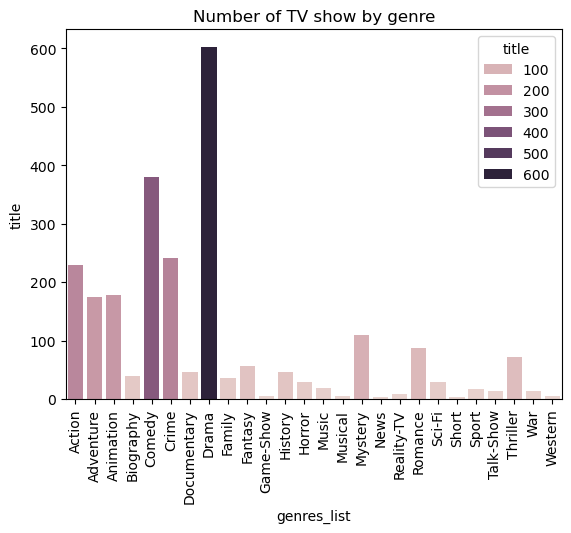

In [2]:
# Adding a columns decade to check best decades
df['decade'] = (df['releaseYear'] // 10) * 10

df['genres_list'] = df['genres'].str.split(', ')
df_exploded = df.explode('genres_list')

genre = df_exploded.groupby('genres_list')['title'].nunique().reset_index()

sns.barplot(data=genre, x='genres_list', y='title', hue='title')
plt.title('Number of TV show by genre')
plt.xticks(rotation=90)
plt.show()

## Drama is the most represented genre but is it the most popular in term of rating ?

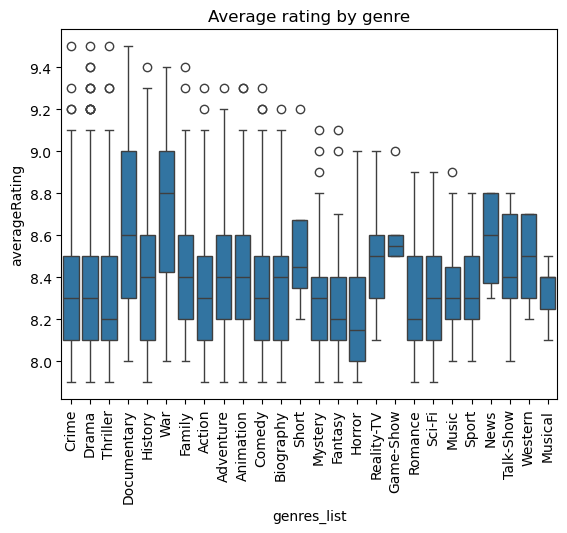

In [3]:
genre = df_exploded.groupby('genres_list')['averageRating'].mean().reset_index()

sns.boxplot(data=df_exploded, x='genres_list', y='averageRating')
plt.title('Average rating by genre')
plt.xticks(rotation=90)
plt.show()

## Which decade has produce the best TV Shows?

   decade  averageRating
0    1950       8.575000
1    1960       8.350000
2    1970       8.462500
3    1980       8.463043
4    1990       8.395062
5    2000       8.391979
6    2010       8.358575
7    2020       8.320976


/tmp/ipykernel_116679/2195122134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='decade', y='averageRating', palette='viridis', legend='brief')


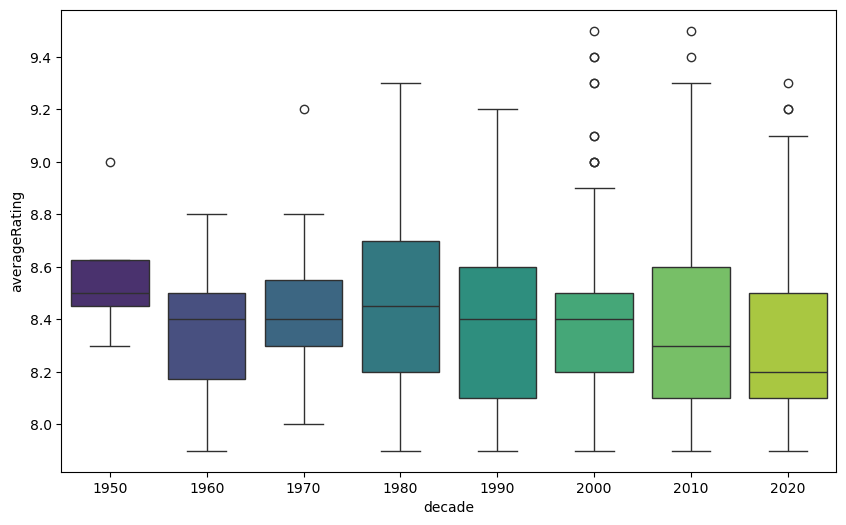

In [4]:
golden_decade = df.groupby('decade')['averageRating'].mean().reset_index()
print(golden_decade)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='decade', y='averageRating', palette='viridis', legend='brief')

plt.show()

## It seems that average rating is decreasing over the years. Let's check correlations

-0.10904120201911018


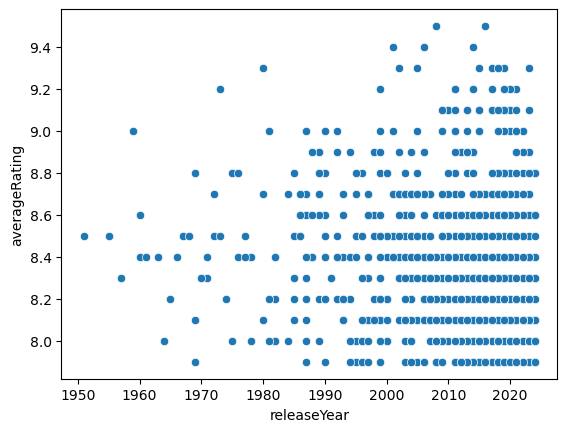

In [5]:
time_correlation = df['releaseYear'].corr(df['averageRating'])
print(time_correlation)

sns.scatterplot(data=df, x='releaseYear', y='averageRating')
plt.show()

### There is no real correlation between year and average rating

## Does the number of vote help the rating?

0.2604439599310539


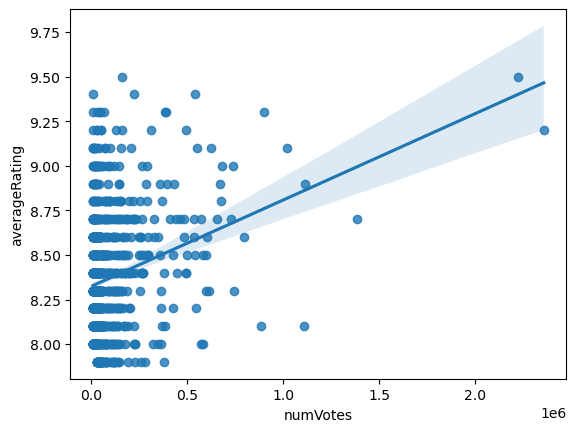

In [6]:
votes_correlation = df['numVotes'].corr(df['averageRating'])
print(votes_correlation)


sns.regplot(data=df, x='numVotes', y='averageRating', scatter=True)

plt.show()

### There is a weak correlation between number of votes and rating

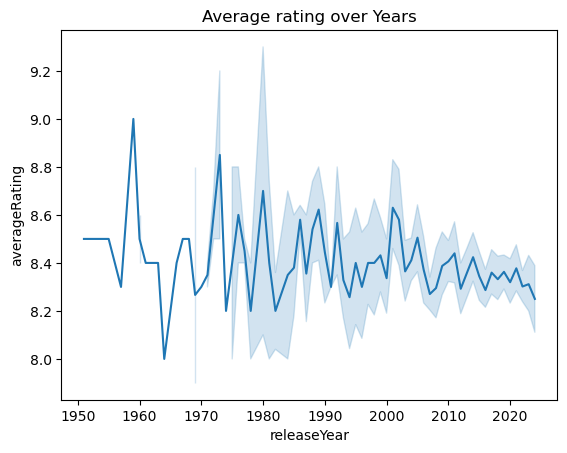

In [7]:
sns.lineplot(data=df, y='averageRating', x='releaseYear')
plt.title('Average rating over Years')
plt.show()